### Problem Statement:

Classifying the gender of people with respect to their facial features into Male/Female using an Artificial Neural Network.

#### Import Libraries:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
df=pd.read_csv("gender_classification_v7.csv")

#Top 2 rows
df.head(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female


In [102]:
# Checking the shape of data
df.shape

(5001, 8)

#### Data Preprocessing:

In [103]:
# Checking for null values
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

No null values present in the data.

In [104]:
# Splitting Data into Depenedent and Independent variables
X=df.drop(columns=['gender'])
y=df[['gender']]

In [105]:
# Scaling the Independent variables 
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
df_scaled.head(2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.387194,-1.247933,0.283971,1.012273,-1.015924,1.013894,1.002202
1,-2.582682,0.739389,-1.009418,-0.987876,-1.015924,1.013894,-0.997803


In [106]:
# Encoding Depenedent variable
lb=LabelEncoder()
df_encoded=y.apply(LabelEncoder().fit_transform)
df_encoded.head(2)

,gender
0,1
1,0


In [107]:
# Splitting data into Train and Test
X_train,X_test,y_train,y_test=train_test_split(df_scaled,df_encoded,test_size=0.3,random_state=10)
print("X-Train shape",X_train.shape)
print("X-Test shape",X_test.shape)
print("y-Train shape",y_train.shape)
print("y-Test shape",y_test.shape)

X-Train shape (3500, 7)
X-Test shape (1501, 7)
y-Train shape (3500, 1)
y-Test shape (1501, 1)


#### Building ANN model :

In [108]:
#Initializing an Ann Model
ann_model=Sequential()

# Input layer with input size same as the number of independent variables with number of neurons as 32 and activation 'relu'
ann_model.add(Dense(units=32,activation='relu',input_dim=7))

#Adding 2nd Dense Layer with number of neurons as 16 and activation 'relu'
ann_model.add(Dense(units=16,activation='relu'))
              
#Adding 3rd Dense Layer with number of neurons as 16 and activation 'relu'
ann_model.add(Dense(units=8,activation='relu'))

#Adding Final output layer with 1 neuron and actiavtion 'sigmoid' since it is a binary classification 
ann_model.add(Dense(units=1,activation='sigmoid'))

In [109]:
#Looking at the entire structure of the model.
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


#### Model Compile :

In [110]:
# Compiling the model using optimizer 'adam',loss is calculated with binary cross-entropy and accuracy metrics is used.
ann_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

#### Train Model :

In [111]:
# Filtting the model and validating the results on test data with batch size of 32 and running for 100 epochs
my_model=ann_model.fit(x=X_train,y=y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
110/110 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8617 - val_loss: 0.1533 - val_accuracy: 0.9700
Epoch 2/100
110/110 [==============================] - 0s 980us/step - loss: 0.1093 - accuracy: 0.9614 - val_loss: 0.0713 - val_accuracy: 0.9740
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9643 - val_loss: 0.0661 - val_accuracy: 0.9760
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9643 - val_loss: 0.0651 - val_accuracy: 0.9760
Epoch 5/100
110/110 [==============================] - 0s 989us/step - loss: 0.0792 - accuracy: 0.9663 - val_loss: 0.0638 - val_accuracy: 0.9747
Epoch 6/100
110/110 [==============================] - 0s 994us/step - loss: 0.0773 - accuracy: 0.9677 - val_loss: 0.0632 - val_accuracy: 0.9767
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9666 - val_loss: 0.0635 - val_accuracy: 

110/110 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9800 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 58/100
110/110 [==============================] - 0s 914us/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.0757 - val_accuracy: 0.9740
Epoch 59/100
110/110 [==============================] - 0s 990us/step - loss: 0.0497 - accuracy: 0.9809 - val_loss: 0.0769 - val_accuracy: 0.9720
Epoch 60/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9789 - val_loss: 0.0759 - val_accuracy: 0.9720
Epoch 61/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9817 - val_loss: 0.0757 - val_accuracy: 0.9700
Epoch 62/100
110/110 [==============================] - 0s 954us/step - loss: 0.0497 - accuracy: 0.9803 - val_loss: 0.0736 - val_accuracy: 0.9727
Epoch 63/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9803 - val_loss: 0.0787 - val_accuracy: 0.9707

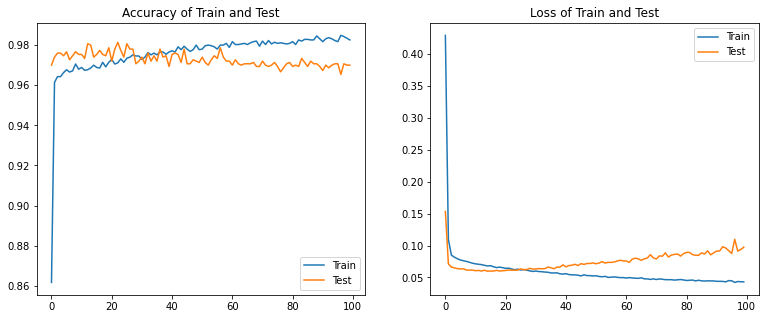

In [112]:
#Plotting the final results
plt.figure(figsize=(20,5))
plt.subplot(132)
plt.plot(my_model.history['accuracy'],label='Train')
plt.plot(my_model.history['val_accuracy'],label="Test")
plt.title("Accuracy of Train and Test")
plt.legend()

plt.subplot(133)
plt.plot(my_model.history['loss'],label='Train')
plt.plot(my_model.history['val_loss'],label="Test")
plt.title("Loss of Train and Test")
plt.legend()

plt.show()

#### Conclusion:

- We get an ANN model with accuracy of 98% on Train set and 97% on Test set
- Loss on the Train set is 0.04 and 0.07 on Test set.
- The model gives quite high accuracy indicating low bias 
- Since the results on both the sets are close to each other , the rate of variance is quite low as well.